In [2]:
import bnlearn as bn
import matplotlib.pyplot as plt # gráficos y visualizaciones
import seaborn as sns # plt + estadisticas
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sys import path # modificar la lista de rutas de búsqueda que el intérprete de Python utiliza para buscar módulos y paquetes.
import os # interactua con el sistema operativo
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import funtions


../resources/allColProSol.xlsx
../resources/dataset_a_2021.csv
../resources/dataset_a_2021v1.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv
../resources/exitoFallidoEnviosProgramaSol.xlsx
../resources/exitoFallidoProgramaSol.xlsx
../resources/exitosoFallidosEnviosAllColProSol.xlsx
../resources/exitosoFallidosEnviosAllColSol.xlsx
../resources/exitososFallidosEnviosSol.xlsx
../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../resources/sinColCeroExitosoFallidosSol.xlsx
../resources/v2_hitosExitoFalloColESol1.csv


El dataFrame original cuenta con 76 columnas, de las cuales las mas importantes a considerar bajo el criterio de su relevancia son:

+ `exitosos`: representa el exito al resolver una pregunta, este atributo acumula la totalidad de resoluciones correctas de la guia.
+ `fallidos`: representa cuantas veces fallo en las preguntas que trato de resolver.
+ `programa`: indica al programa que pertenece.
+ `sol1`: nota final obtenida en la solemne 1.

siendo las segundas mas importantes a considerar: `las columnas de la e0 hasta la e52`, estas columnas son la representacion de la resolucion de la guia segun su preguntas, en donde, si la pregunta fue bien resuelta se le asigna un 1, su valor por defecto es 0.




In [3]:
df = pd.read_excel(open('../resources/exitoFallidoProgramaSol.xlsx','rb'))
df.head()

,exitosos,fallidos,programa,sol1
0,10,21,UNAB22115,1.0
1,7,9,UNAB22115,1.0
2,6,10,UNAB22115,1.0
3,0,0,UNAB22115,1.0
4,0,0,UNAB22510,1.0


In [4]:
# Convertir la columna "sol1" a números de punto flotante
df['sol1'] = df['sol1'].astype(float)
df['exitosos'] = df['exitosos'].astype(int)
df['fallidos'] = df['fallidos'].astype(int)

In [5]:
df['aprobado']=df.apply(lambda x: funtions.set_in_aprobado_nota(x['sol1']),axis = 1 )
print(df.columns)

Index(['exitosos', 'fallidos', 'programa', 'sol1', 'aprobado'], dtype='object')


Text(0.5, 1.0, 'Aprobados/Reprobados Solemne 1')

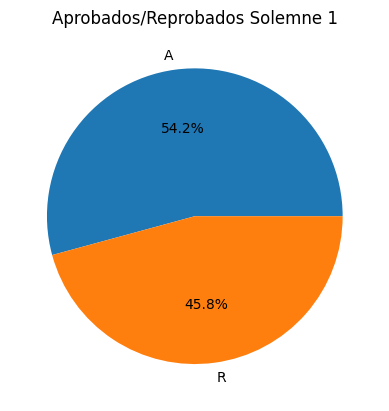

In [6]:
plt.pie(df['aprobado'].value_counts(),labels=['A','R'],autopct='%1.1f%%')
plt.title('Aprobados/Reprobados Solemne 1')


# Guardar el gráfico como imagen en la ruta especificada
# plt.savefig("E:\\dev\\tesis\\LaTeX\\img\\aprobadosReprobados.png")

In [7]:
print("Buscando el valor unico y su cardinalidad \n");
df['programa'].value_counts()

Buscando el valor unico y su cardinalidad 



UNAB12100    213
UNAB11500    185
UNAB12210    180
UNAB22115     94
UNAB21500     42
UNAB22100     41
UNAB22510     32
UNAB12510     30
UNAB21503     16
UNAB18000      2
UNAB22505      1
UNAB16507      1
UNAB35636      1
UNAB10100      1
Name: programa, dtype: int64

In [8]:
print("Porcentaje de aprobacion solemne 1 ")

print("UNAB12100: {0:.2f}%"
    .format((df[(df['programa']=='UNAB12100') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB12100'].shape[0])*100))

print("UNAB11500: {0:.2f}%"
    .format((df[(df['programa']=='UNAB11500') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB11500'].shape[0])*100))

print("UNAB12210: {0:.2f}%"
    .format((df[(df['programa']=='UNAB12210') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB12210'].shape[0])*100))

print("UNAB22115: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22115') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22115'].shape[0])*100))

print("UNAB21500: {0:.2f}%"
    .format((df[(df['programa']=='UNAB21500') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB21500'].shape[0])*100))

print("UNAB22100: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22100') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22100'].shape[0])*100))

print("UNAB22510: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22510') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22510'].shape[0])*100))

print("UNAB21503: {0:.2f}%"
    .format((df[(df['programa']=='UNAB21503') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB21503'].shape[0])*100))

print("UNAB18000: {0:.2f}%"
    .format((df[(df['programa']=='UNAB18000') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB18000'].shape[0])*100))

print("UNAB22505: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22505') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22505'].shape[0])*100))

print("UNAB22510: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22510') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22510'].shape[0])*100))

print("UNAB16507: {0:.2f}%"
    .format((df[(df['programa']=='UNAB16507') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB16507'].shape[0])*100))

print("UNAB35636: {0:.2f}%"
    .format((df[(df['programa']=='UNAB35636') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB35636'].shape[0])*100))

print("UNAB10100: {0:.2f}%"
    .format((df[(df['programa']=='UNAB10100') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB10100'].shape[0])*100))

Porcentaje de aprobacion solemne 1 
UNAB12100: 28.64%
UNAB11500: 43.78%
UNAB12210: 65.56%
UNAB22115: 43.62%
UNAB21500: 38.10%
UNAB22100: 58.54%
UNAB22510: 34.38%
UNAB21503: 75.00%
UNAB18000: 0.00%
UNAB22505: 0.00%
UNAB22510: 34.38%
UNAB16507: 0.00%
UNAB35636: 100.00%
UNAB10100: 100.00%


Se realiza el aprendizaje de la estructura de una red bayesiana y luego se revisa la matriz de adyacencia de la red bayesiana aprendida.

In [9]:
DAG = bn.structure_learning.fit(df)
print(DAG['adjmat'])

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
target    exitosos  fallidos  programa   sol1  aprobado
source                                                 
exitosos     False     False     False  False     False
fallidos     False     False     False  False     False
programa     False     False     False  False     False
sol1         False     False     False  False     False
aprobado      True     False     False   True     False


Podemos imprimir el 

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


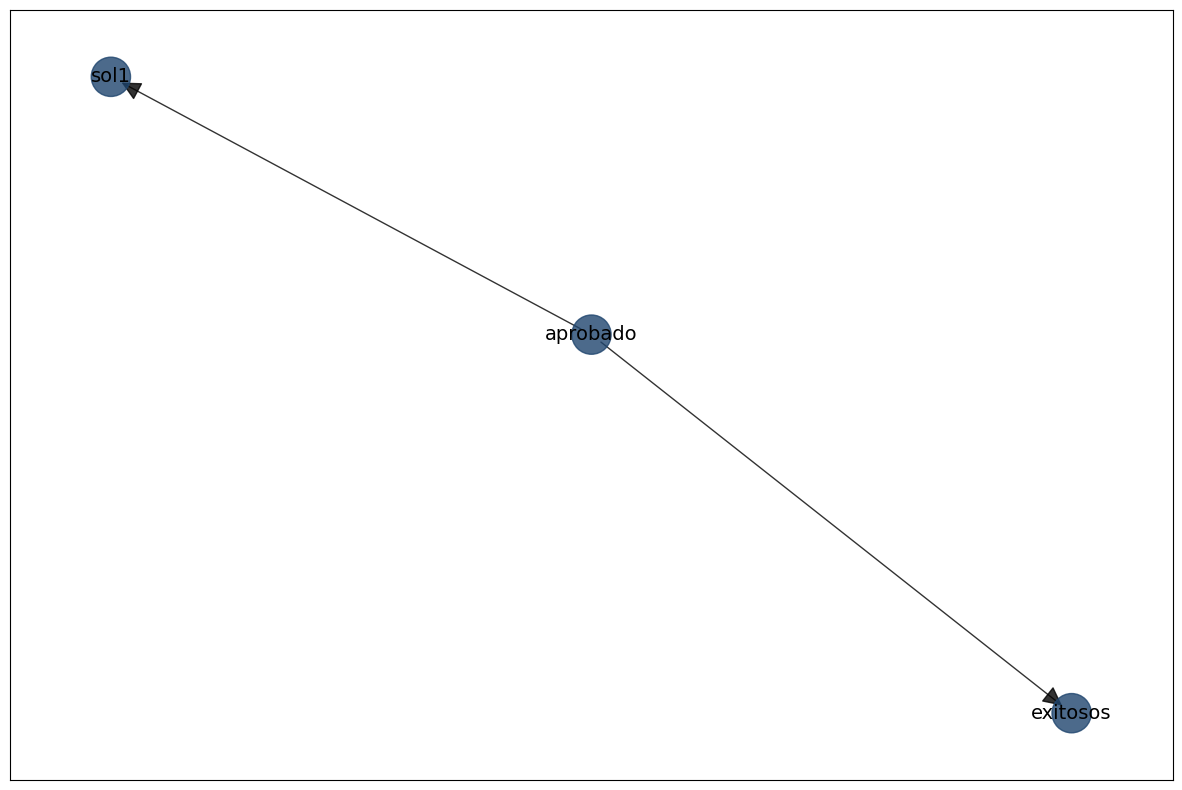

{'fig': <Figure size 1500x1000 with 1 Axes>, 'ax': <Figure size 1500x1000 with 1 Axes>, 'pos': {'exitosos': array([ 0.52935178, -0.57503884]), 'fallidos': array([-0.1695236 ,  0.98972468]), 'programa': array([0.87514994, 0.52640907]), 'sol1': array([-1.        , -0.44400474]), 'aprobado': array([-0.23497812, -0.49709016])}, 'G': <networkx.classes.digraph.DiGraph object at 0x000001E54935F670>, 'node_properties': {'exitosos': {'node_color': '#1f456e', 'node_size': 800}, 'fallidos': {'node_color': '#1f456e', 'node_size': 800}, 'programa': {'node_color': '#1f456e', 'node_size': 800}, 'sol1': {'node_color': '#1f456e', 'node_size': 800}, 'aprobado': {'node_color': '#1f456e', 'node_size': 800}}, 'edge_properties': {('aprobado', 'exitosos'): {'color': '#000000', 'weight': 1}, ('aprobado', 'sol1'): {'color': '#000000', 'weight': 1}}}


In [10]:
G = bn.plot(DAG)
print(G)

In [11]:
# Parameter learning on the user-defined DAG and input data using Bayes
model_bayes = bn.parameter_learning.fit(DAG, df, methodtype='bayes')

# Print the learned CPDs
bn.print_CPD(model_bayes)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of aprobado:
+-------------+----------+
| aprobado(0) | 0.519304 |
+-------------+----------+
| aprobado(1) | 0.480696 |
+-------------+----------+
[bnlearn] >CPD of exitosos:
+--------------+----------------------+----------------------+
| aprobado     | aprobado(0)          | aprobado(1)          |
+--------------+----------------------+----------------------+
| exitosos(0)  | 0.16097096620656823  | 0.07208967503085148  |
+--------------+----------------------+----------------------+
| exitosos(1)  | 0.03217515468824368  | 0.026840806252570952 |
+--------------+----------------------+----------------------+
| exitosos(2)  | 0.03845787720133268  | 0.026840806252570952 |
+--------------+----------------------+----------------------+
| exitosos(3)  | 0.04369347929557352  | 0.037021

{'aprobado':    aprobado         p
 0         0  0.519304
 1         1  0.480696,
 'exitosos':     exitosos  aprobado         p
 0          0         0  0.160971
 1          0         1  0.072090
 2          1         0  0.032175
 3          1         1  0.026841
 4          2         0  0.038458
 5          2         1  0.026841
 6          3         0  0.043693
 7          3         1  0.037022
 8          4         0  0.043693
 9          4         1  0.035891
 10         5         0  0.046835
 11         5         1  0.044940
 12         6         0  0.060447
 13         6         1  0.047203
 14         7         0  0.075107
 15         7         1  0.053990
 16         8         0  0.056259
 17         8         1  0.051728
 18         9         0  0.045788
 19         9         1  0.057384
 20        10         0  0.051023
 21        10         1  0.061909
 22        11         0  0.040552
 23        11         1  0.074352
 24        12         0  0.043693
 25        12         

In [12]:
# model_mle = bn.parameter_learning.fit(DAG, df, methodtype='maximumlikelihood')
# bn.print_CPD(model_mle)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


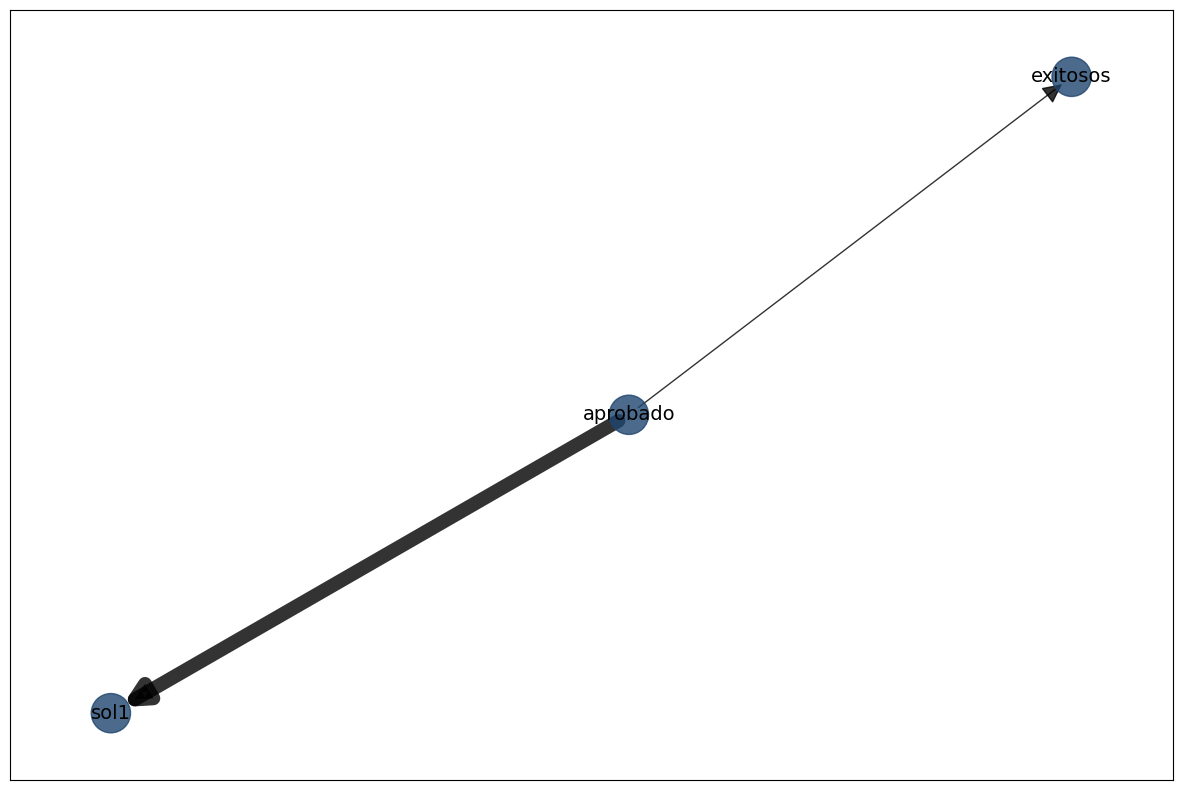

In [13]:
model = bn.structure_learning.fit(df)
# Compute edge strength with the chi_square test statistic
model = bn.independence_test(model, df)
G = bn.plot(model)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


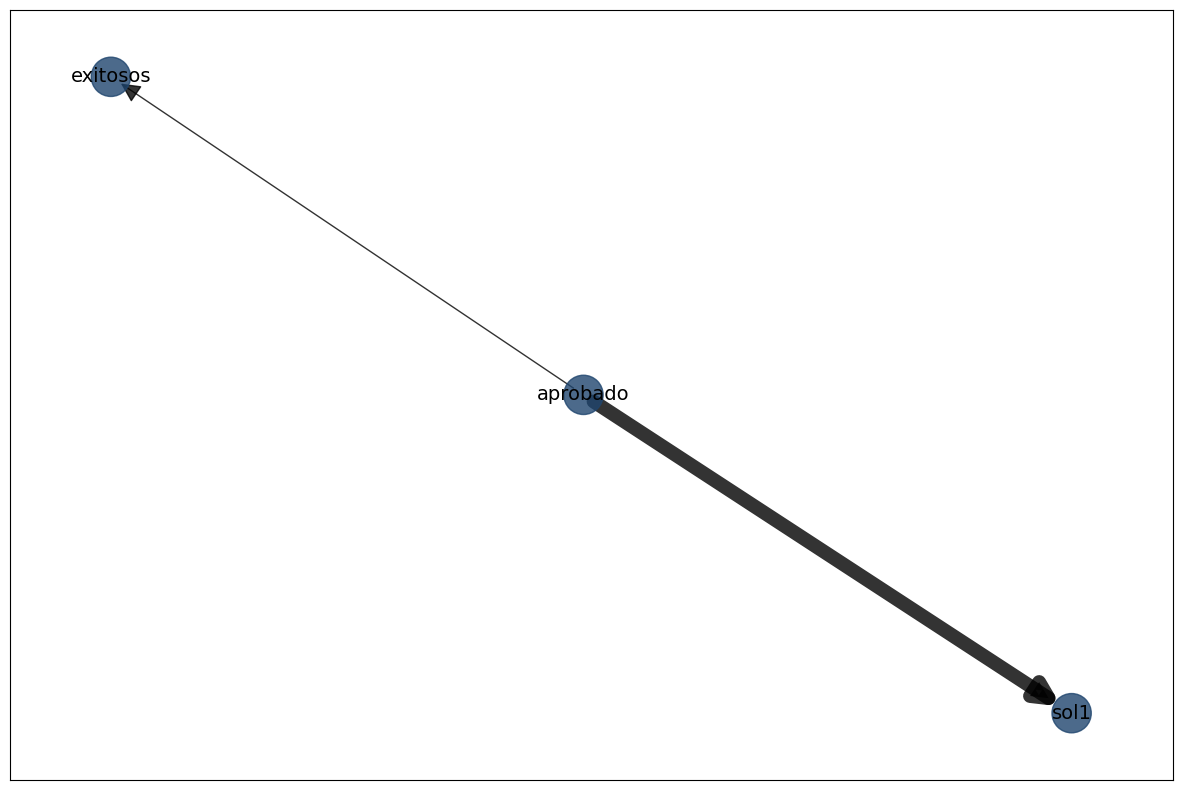

In [14]:
model_hc_bic  = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
model_hc_bic = bn.independence_test(model_hc_bic, df)
G = bn.plot(model_hc_bic)

In [15]:
# model_hc_k2   = bn.structure_learning.fit(df, methodtype='hc', scoretype='k2')
# model_hc_k2 = bn.independence_test(model_hc_k2, df)
# G = bn.plot(model_hc_k2)

In [16]:
# model_hc_bdeu = bn.structure_learning.fit(df, methodtype='hc', scoretype='bdeu')
# model_hc_bdeu = bn.independence_test(model_hc_bdeu, df)
# G = bn.plot(model_hc_bdeu)

In [17]:
# model_ex_bic  = bn.structure_learning.fit(df, methodtype='ex', scoretype='bic')
# model_ex_bic = bn.independence_test(model_ex_bic, df)
# G = bn.plot(model_ex_bic)

In [18]:
# model_ex_k2   = bn.structure_learning.fit(df, methodtype='ex', scoretype='k2')
# model_ex_k2 = bn.independence_test(model_ex_k2, df)
# G = bn.plot(model_ex_k2)

In [19]:
# model_ex_bdeu = bn.structure_learning.fit(df, methodtype='ex', scoretype='bdeu')
# model_ex_bdeu = bn.independence_test(model_ex_bdeu, df)
# G = bn.plot(model_ex_bdeu)

In [20]:
# model_cl = bn.structure_learning.fit(df, methodtype='cl', root_node='Wet_Grass')
# model_cl = bn.independence_test(model_cl, df)
# G = bn.plot(model_cl)

In [21]:
# model_tan     = bn.structure_learning.fit(df, methodtype='tan', root_node='Wet_Grass', class_node='Rain')
# model_tan = bn.independence_test(model_tan, df)
# G = bn.plot(model_tan)